In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Cargando archivo desde el directorio de trabajo
from google.colab import files
import pandas as pd

# Cargar un archivo desde tu dispositivo local
Archivo = files.upload()

# Obtener la ruta del archivo cargado
Ruta = list(Archivo.keys())[0]

# Leer el archivo con pandas
datos = pd.read_csv(Ruta,sep=',')

# Mostrar los 10 primeros registros del DataFrame
print()
datos.head(10)

In [1]:
#Cargar las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Graficar
%matplotlib inline
import seaborn as sns
from collections import Counter
import math


In [2]:
datos = pd.read_csv("Forbes2000.csv", sep=',')
datos.head()

,rownames,rank,name,country,category,sales,profits,assets,marketvalue
0,1,1,Citigroup,United States,Banking,94.71,17.85,1264.03,255.30
1,2,2,General Electric,United States,Conglomerates,134.19,15.59,626.93,328.54
2,3,3,American Intl Group,United States,Insurance,76.66,6.46,647.66,194.87
3,4,4,ExxonMobil,United States,Oil & gas operations,222.88,20.96,166.99,277.02
4,5,5,BP,United Kingdom,Oil & gas operations,232.57,10.27,177.57,173.54


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rownames     2000 non-null   int64  
 1   rank         2000 non-null   int64  
 2   name         2000 non-null   object 
 3   country      2000 non-null   object 
 4   category     2000 non-null   object 
 5   sales        2000 non-null   float64
 6   profits      1995 non-null   float64
 7   assets       2000 non-null   float64
 8   marketvalue  2000 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 140.8+ KB


In [5]:
#Identifiacion de datos nulos
datos.isna().sum()

rownames       0
rank           0
name           0
country        0
category       0
sales          0
profits        5
assets         0
marketvalue    0
dtype: int64

In [6]:
#imputacion de datos mediante la media
datos['profits'].fillna(value=datos['profits'].mean(), inplace=True)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rownames     2000 non-null   int64  
 1   rank         2000 non-null   int64  
 2   name         2000 non-null   object 
 3   country      2000 non-null   object 
 4   category     2000 non-null   object 
 5   sales        2000 non-null   float64
 6   profits      2000 non-null   float64
 7   assets       2000 non-null   float64
 8   marketvalue  2000 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 140.8+ KB


In [7]:
#Media
media_profits =datos['profits'].mean()
print("Media de la cantidad de ganancias de la empresa en miles de millones de dólares.", media_profits)
#Mediana
mediana_profits =datos['profits'].median()
print(f"Mediana de la cantidad de ganancias de la empresa en miles de millones de dólares. {mediana_profits}")
#Moda
moda_profits = datos['profits'].mode()
print("Moda de la cantidad de ganancias de la empresa en miles de millones de dólares.", moda_profits)


Media de la cantidad de ganancias de la empresa en miles de millones de dólares. 0.3811328320802005
Mediana de la cantidad de ganancias de la empresa en miles de millones de dólares. 0.2
Moda de la cantidad de ganancias de la empresa en miles de millones de dólares. 0    0.13
Name: profits, dtype: float64


In [11]:
#Varianza
varianza_profits =datos['profits'].var()
print("La varianza de la cantidad de ganancias de la empresa en miles de millones de dólares.", varianza_profits)
#Desviación estandar
desvest_profits =np.sqrt(varianza_profits)
print("La desviación estándar de la cantidad de ganancias de la empresa en miles de millones de dólares.", desvest_profits)
#Coeficiente de variación
CV_profits=(desvest_profits/media_profits)*100
print("El coeficiente de variación de la cantidad de ganancias de la empresa en miles de millones de dólares.", CV_profits)
#Rango
Rango_profits=datos['profits'].max()-datos['profits'].min()
print("El rango de la cantidad de ganancias de la empresa en miles de millones de dólares.", Rango_profits)

La varianza de la cantidad de ganancias de la empresa en miles de millones de dólares. 3.109031635717608
La desviación estándar de la cantidad de ganancias de la empresa en miles de millones de dólares. 1.7632446329756992
El coeficiente de variación de la cantidad de ganancias de la empresa en miles de millones de dólares. 462.63257441034773
El rango de la cantidad de ganancias de la empresa en miles de millones de dólares. 46.79


In [12]:
#Coeficiente de Asimetría
Asimetria_profits=datos['profits'].skew()
print("El coeficiente de asimetría de la cantidad de ganancias de la empresa en miles de millones de dólares.", Asimetria_profits)
#Coeficiente de Kurtosis
Kurtosis_profits=datos['profits'].kurt()
print("El coeficiente de curtosis de la cantidad de ganancias de la empresa en miles de millones de dólares.", Kurtosis_profits)

El coeficiente de asimetría de la cantidad de ganancias de la empresa en miles de millones de dólares. -1.83843121467824
El coeficiente de curtosis de la cantidad de ganancias de la empresa en miles de millones de dólares. 73.88230267405072


In [13]:
#Tercios
Q1= np.percentile(datos['profits'], 33)
Q2= np.percentile(datos['profits'], 66)
print(Q1,Q2)
print("El 33% de la cantidad de ganancias de la empresa son menores o iguales a:", Q1)
print("El 66% de la cantidad de ganancias de la empresa son menores o iguales a:", Q2)

0.12 0.31
El 33% de la cantidad de ganancias de la empresa son menores o iguales a: 0.12
El 66% de la cantidad de ganancias de la empresa son menores o iguales a: 0.31


In [14]:
#Cuartiles
Q1= np.percentile(datos['sales'], 25)
Q2= np.percentile(datos['sales'], 50)
Q3= np.percentile(datos['sales'], 75)
print(Q1,Q2,Q3)
print("El 25% de la cantidad de ventas de la empresa son menores o iguales a:", Q1)
print("El 50% de la cantidad de ventas de la empresa son menores o iguales a:", Q2)
print("El 75% de la cantidad de ventas de la empresa son menores o iguales a:", Q3)

2.0175 4.365 9.5475
El 25% de la cantidad de ventas de la empresa son menores o iguales a: 2.0175
El 50% de la cantidad de ventas de la empresa son menores o iguales a: 4.365
El 75% de la cantidad de ventas de la empresa son menores o iguales a: 9.5475


In [15]:
datos.describe()

,rownames,rank,sales,profits,assets,marketvalue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,1000.500000,9.697010,0.381133,34.041850,11.877655
std,577.494589,577.494589,18.002592,1.763245,99.678786,24.460197
min,1.000000,1.000000,0.010000,-25.830000,0.270000,0.020000
25%,500.750000,500.750000,2.017500,0.080000,4.025000,2.720000
50%,1000.500000,1000.500000,4.365000,0.200000,9.345000,5.150000
75%,1500.250000,1500.250000,9.547500,0.440000,22.792500,10.602500
max,2000.000000,2000.000000,256.330000,20.960000,1264.030000,328.540000


In [16]:
#Tabla de frecuencias con los intervalos automáticos

def tabla_frecuencia(datos):
    columna = datos['profits']  # Seleccionar la columna de interés
    n = len(columna)  # Cantidad de datos
    k = math.ceil(1 + math.log2(n))  # Regla de Sturges
    min_val, max_val = min(columna), max(columna)
    rango = max_val - min_val
    amplitud = rango / k  # Amplitud de los intervalos

    # Definir los intervalos
    bins = np.linspace(min_val, max_val, k + 1)

    # Calcular frecuencias
    frecuencias, _ = np.histogram(columna, bins)

    # Calcular frecuencias acumuladas
    frec_acumulada = np.cumsum(frecuencias)

    # Calcular frecuencia relativa
    frec_relativa = frecuencias / n

    # Calcular frecuencia relativa acumulada
    frec_rel_acumulada = np.cumsum(frec_relativa)

    # Crear tabla de frecuencias
    tabla = pd.DataFrame({
        'Intervalo': [f'[{bins[i]:.2f}, {bins[i+1]:.2f})' for i in range(len(bins)-1)],
        'Frecuencia': frecuencias,
        'Frec. Acumulada': frec_acumulada,
        'Frec. Relativa': frec_relativa,
        'Frec. Rel. Acumulada': frec_rel_acumulada
    })

    return tabla

# Aplicar función al DataFrame
resultado = tabla_frecuencia(datos)
print(resultado)

           Intervalo  Frecuencia  Frec. Acumulada  Frec. Relativa  \
0   [-25.83, -21.93)           1                1          0.0005   
1   [-21.93, -18.03)           2                3          0.0010   
2   [-18.03, -14.13)           2                5          0.0010   
3   [-14.13, -10.23)           1                6          0.0005   
4    [-10.23, -6.33)           2                8          0.0010   
5     [-6.33, -2.43)          17               25          0.0085   
6      [-2.43, 1.46)        1820             1845          0.9100   
7       [1.46, 5.36)         125             1970          0.0625   
8       [5.36, 9.26)          24             1994          0.0120   
9      [9.26, 13.16)           3             1997          0.0015   
10    [13.16, 17.06)           1             1998          0.0005   
11    [17.06, 20.96)           2             2000          0.0010   

    Frec. Rel. Acumulada  
0                 0.0005  
1                 0.0015  
2                 0.0

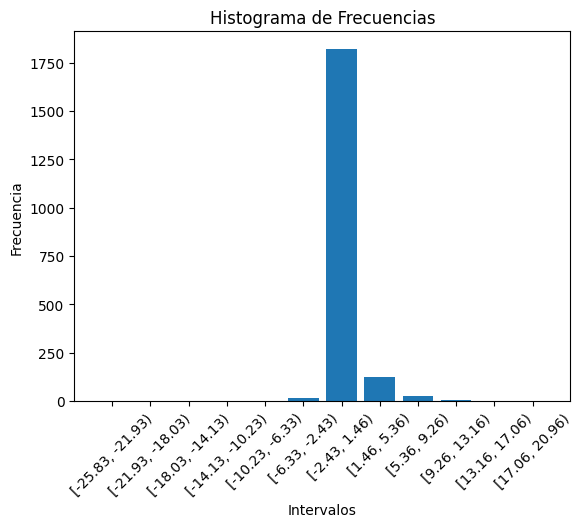

In [17]:
#El histograma de frecuencias
plt.bar(resultado['Intervalo'], resultado['Frecuencia'], align='center')
plt.xticks(rotation=45)
plt.xlabel('Intervalos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frecuencias')
plt.show()

<Axes: xlabel='profits', ylabel='Count'>

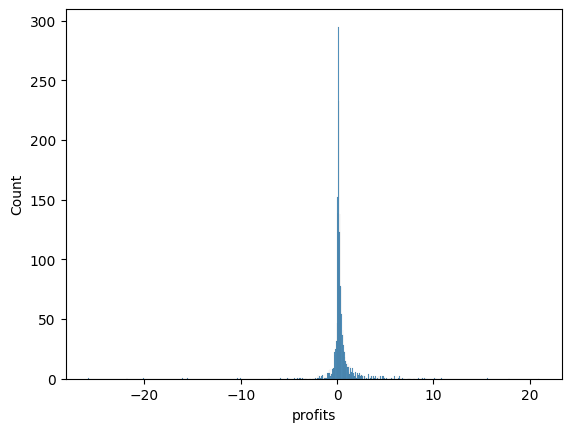

In [18]:
#Otra visualización para el Histograma de frecuencias
sns.histplot(datos['profits'])

<Axes: xlabel='profits', ylabel='Density'>

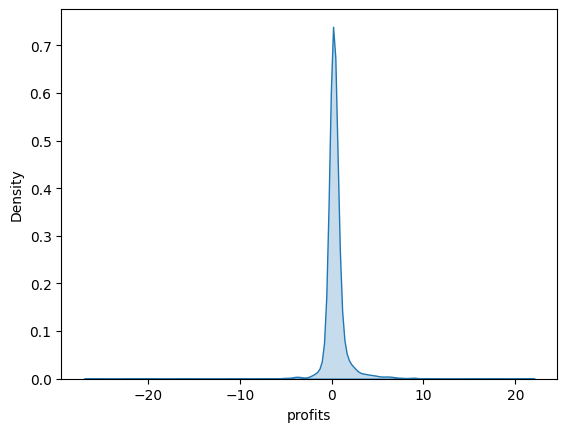

In [19]:
#Gráfico de densidad
sns.kdeplot(datos['profits'], fill=True)

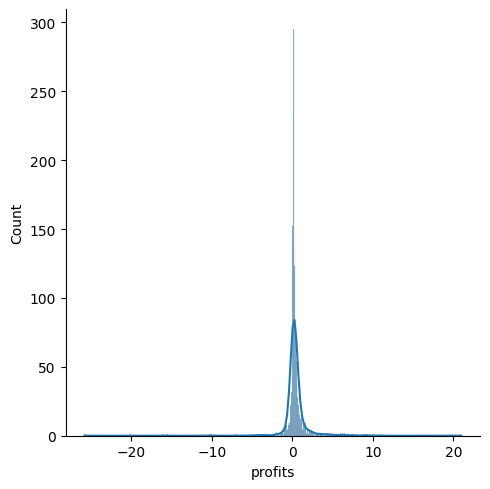

In [20]:
#Diagrama de Densidad con histograma
sns.displot(datos['profits'], kde=True)

<Axes: xlabel='profits'>

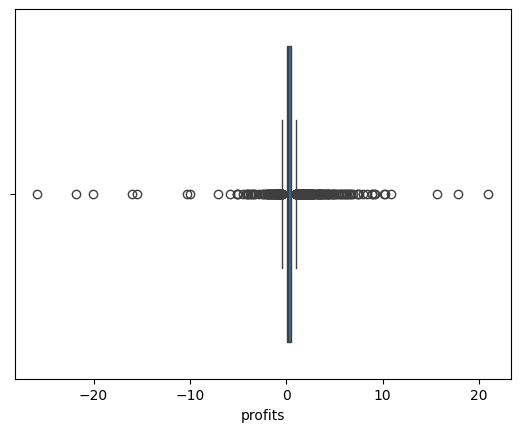

In [21]:
sns.boxplot(datos['profits'],orient="h")


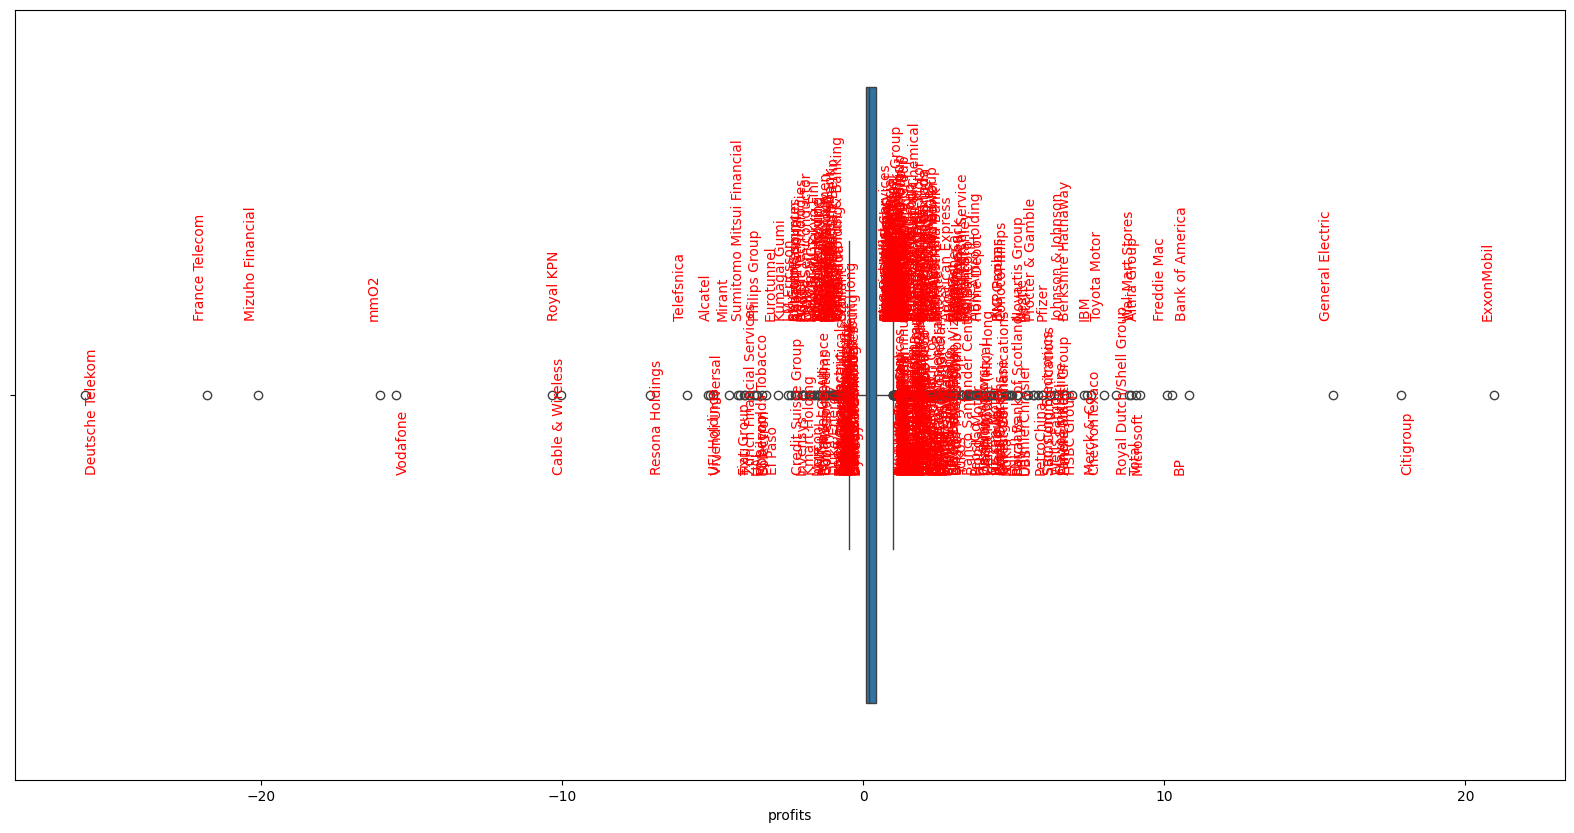

In [22]:
# Suponiendo que 'datos' es un DataFrame con las columnas 'Energy' y 'Continent'

# Cálculo del rango intercuartílico (IQR)
Q1 = datos['profits'].quantile(0.25)
Q3 = datos['profits'].quantile(0.75)
IQR = Q3 - Q1

# Límites para valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar valores atípicos
outliers = datos[(datos['profits'] < lower_bound) | (datos['profits'] > upper_bound)]

# Crear el boxplot con tamaño más grande
plt.figure(figsize=(20, 10))  # Ajusta el tamaño (ancho, alto) según tus necesidades
ax = sns.boxplot(x=datos['profits'], orient="h")

# Agregar etiquetas a los valores atípicos con posición alternada
for i, (index, row) in enumerate(outliers.iterrows()):
    # Alternar posición vertical: arriba (0.1) y abajo (-0.1)
    y_pos = 0.1 if i % 2 == 0 else -0.1

    # Alternar posición horizontal: izquierda (ha='left') y derecha (ha='right')
    ha = 'left' if i % 2 == 0 else 'right'

    ax.text(row['profits'], y_pos, row['name'], color='red', ha=ha, fontsize=10, rotation=90)

plt.show()

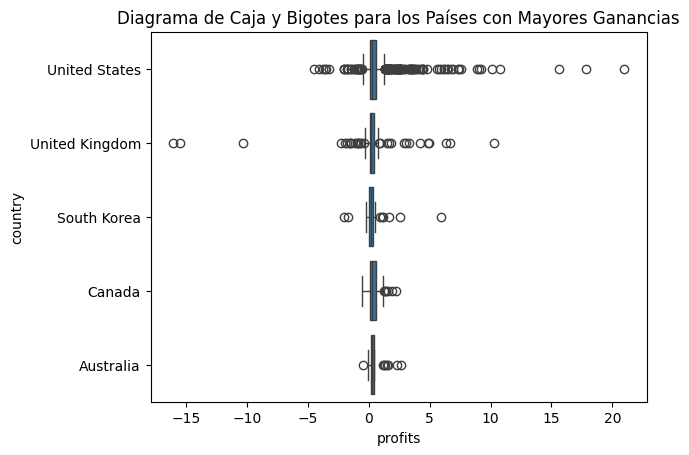

In [23]:
# Filtra los datos y crea el diagrama de caja y bigotes
sns.boxplot(
    data=datos[datos['country'].isin(datos.groupby('country')['profits'].sum().nlargest(5).index)],
    x='profits',
    y='country'
)
plt.title('Diagrama de Caja y Bigotes para los Países con Mayores Ganancias')
plt.show()

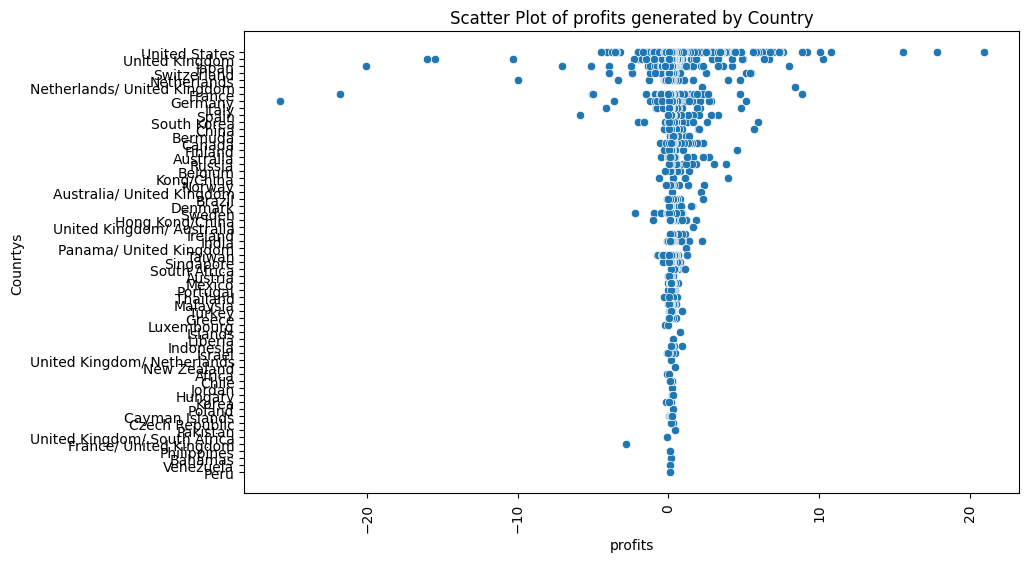

In [25]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='profits', y='country', data=datos)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.ylabel('Counrtys')
plt.xlabel('profits')
plt.title('Scatter Plot of profits generated by Country')
plt.show()


country
United States                  751
Japan                          316
United Kingdom                 137
Germany                         65
France                          63
                              ... 
United Kingdom/ Netherlands      1
Islands                          1
Panama/ United Kingdom           1
United Kingdom/ Australia        1
Peru                             1
Name: count, Length: 61, dtype: int64


country
United States                  0.3755
Japan                          0.1580
United Kingdom                 0.0685
Germany                        0.0325
France                         0.0315
                                ...  
United Kingdom/ Netherlands    0.0005
Islands                        0.0005
Panama/ United Kingdom         0.0005
United Kingdom/ Australia      0.0005
Peru                           0.0005
Name: proportion, Length: 61, dtype: float64

Grafico Barras 



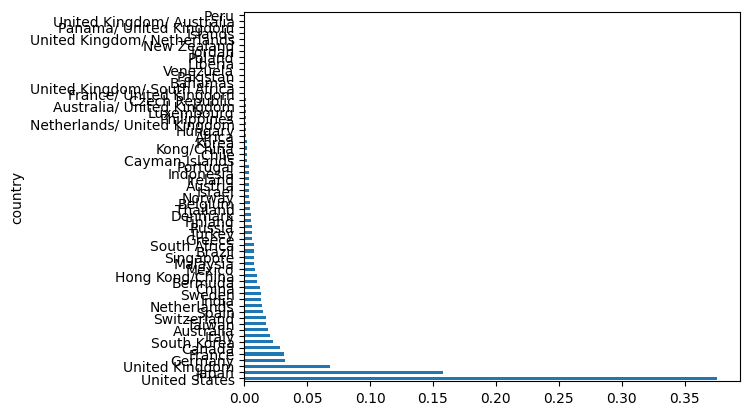

In [26]:
#Gráficos de barras
print(datos['country'].value_counts())
print("\n")
print(datos['country'].value_counts(normalize=True))


print("\nGrafico Barras \n")
datos['country'].value_counts(normalize=True).plot.barh()
plt.show()

country
United States                  0.3755
Japan                          0.1580
United Kingdom                 0.0685
Germany                        0.0325
France                         0.0315
                                ...  
United Kingdom/ Netherlands    0.0005
Islands                        0.0005
Panama/ United Kingdom         0.0005
United Kingdom/ Australia      0.0005
Peru                           0.0005
Name: proportion, Length: 61, dtype: float64


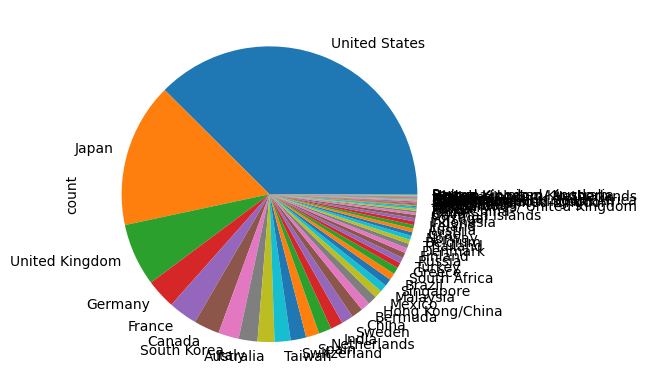

In [27]:
#Gráfico de torta
print(datos['country'].value_counts(normalize=True))
datos['country'].value_counts().plot.pie()
plt.show()

In [28]:
continuas = datos[["sales", "profits", "assets", "marketvalue"]]

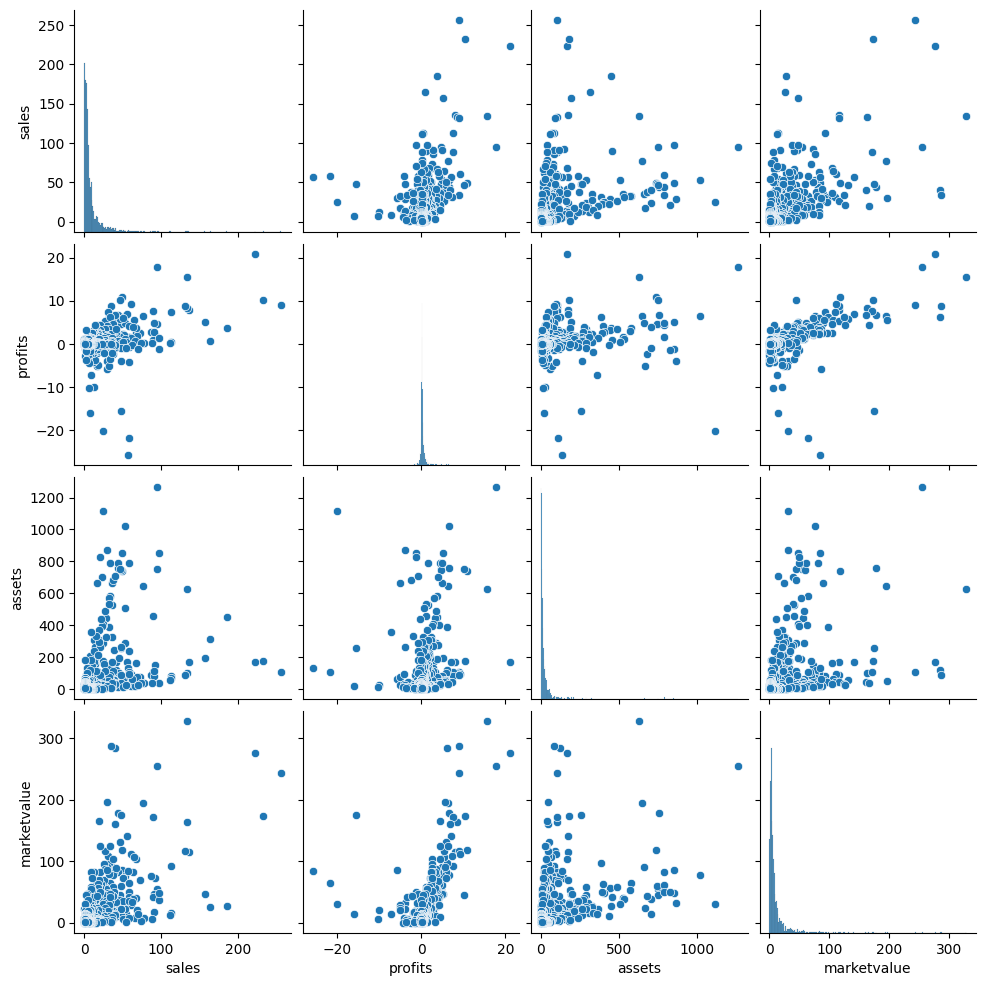

In [29]:
sns.pairplot(continuas)


In [30]:

#La matriz de correlaciones
correlation_matrix=continuas.corr()
continuas.corr()

,sales,profits,assets,marketvalue
sales,1.000000,0.404230,0.426154,0.642053
profits,0.404230,1.000000,0.224343,0.547128
assets,0.426154,0.224343,1.000000,0.453999
marketvalue,0.642053,0.547128,0.453999,1.000000


<Axes: >

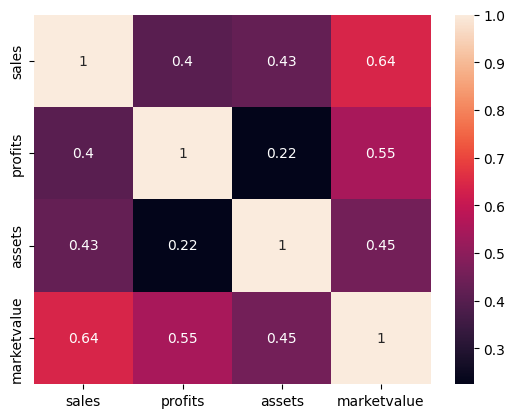

In [31]:
sns.heatmap(correlation_matrix, annot=True)


# PCA

In [32]:
from matplotlib.patches import Ellipse
from scipy.cluster.hierarchy import linkage, leaves_list
# import statsmodels.api as sm
import matplotlib.font_manager
# import geopandas as gpd
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale


In [33]:
pca_continuas = datos[["sales", "profits", "marketvalue"]]

In [34]:
scaler = StandardScaler()
continuas_scaled = scaler.fit_transform(pca_continuas)
pca = PCA()
res_pca = pca.fit(continuas_scaled)

np.set_printoptions(suppress=True)

print("Valores propios (Varianza explicada por cada componente):")
print(np.round(res_pca.explained_variance_, 2))

print("\nProporción de varianza explicada:")
print(np.round(res_pca.explained_variance_ratio_, 2))

print("\nCargas de los componentes (loadings):")
print(np.round(res_pca.components_, 2))

Valores propios (Varianza explicada por cada componente):
[2.07 0.61 0.33]

Proporción de varianza explicada:
[0.69 0.2  0.11]

Cargas de los componentes (loadings):
[[ 0.57  0.53  0.62]
 [-0.59  0.79 -0.13]
 [-0.56 -0.29  0.77]]


In [35]:
#Una mejor visualización de los resultados
cumVar = pd.DataFrame(np.cumsum(res_pca.explained_variance_ratio_)*100,
                      columns=["cumVarPerc"])
expVar = pd.DataFrame(res_pca.explained_variance_ratio_*100, columns=["VarPerc"])
pd.concat([expVar, cumVar], axis=1)\
    .rename(index={0: "PC1", 1: "PC2", 2: "PC3"})


,VarPerc,cumVarPerc
PC1,68.937207,68.937207
PC2,20.165706,89.102913
PC3,10.897087,100.000000


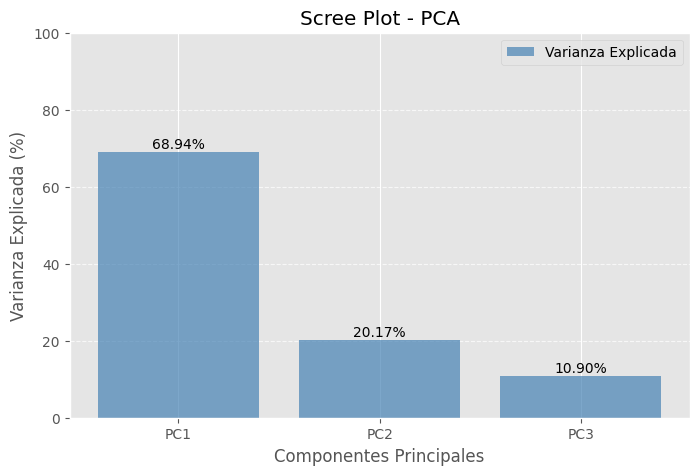

In [36]:
#Visualización del PCA
plt.figure(figsize=(8,5))
plt.bar(range(1, len(res_pca.explained_variance_ratio_)+1),
        res_pca.explained_variance_ratio_*100,
        alpha=0.7, color="steelblue", label="Varianza Explicada")

for i, var in enumerate(res_pca.explained_variance_ratio_*100):
    plt.text(i+1, var+1, f"{var:.2f}%", ha='center', fontsize=10)

plt.xlabel("Componentes Principales")
plt.ylabel("Varianza Explicada (%)")
plt.title("Scree Plot - PCA")
plt.ylim(0, 100)
plt.xticks(range(1, len(res_pca.explained_variance_ratio_)+1),
           [f"PC{i+1}" for i in range(len(res_pca.explained_variance_ratio_))])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.68937207 0.20165706 0.10897087]


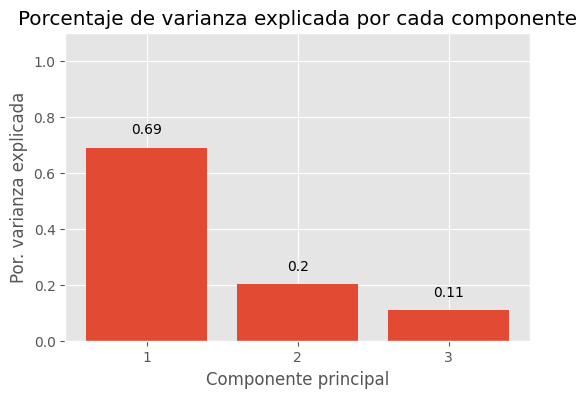

In [37]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(res_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(res_pca.n_components_) + 1,
    height = res_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datos.columns)) + 1, res_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(res_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

0        United States
1        United States
2        United States
3        United States
4       United Kingdom
             ...      
1995          Thailand
1996             Japan
1997             India
1998            France
1999             India
Name: country, Length: 2000, dtype: object


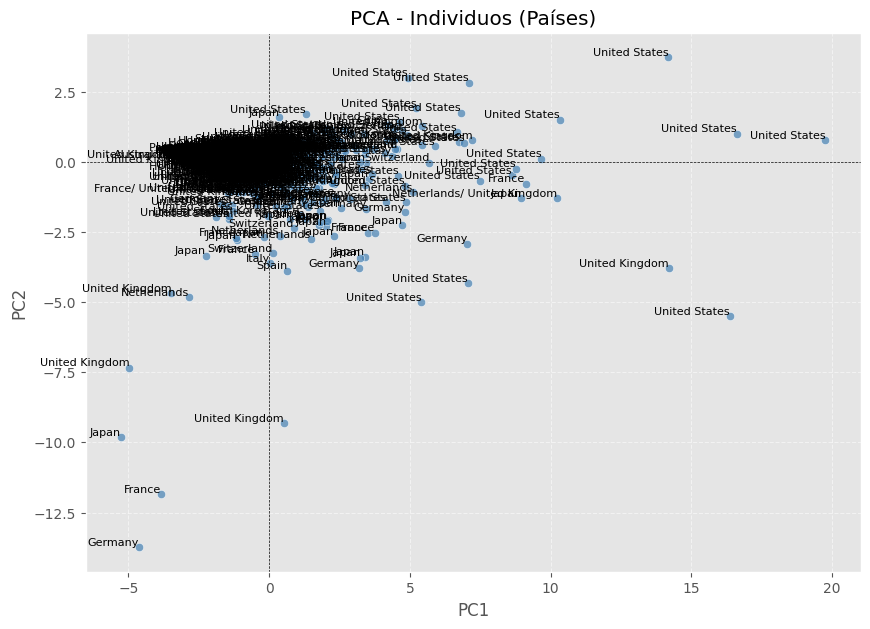

In [38]:
#El gráfico Biplot

pred = res_pca.transform(continuas_scaled)
df_pca_scores = pd.DataFrame(pred, columns=[f"PC{i+1}" for i in range(pred.shape[1])])
paises = datos['country']
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_pca_scores["PC1"], y=df_pca_scores["PC2"], color="steelblue", alpha=0.7)

# Etiquetas con los nombres de los países
print(paises)
for i, pais in enumerate(paises):
    # if abs(df_pca_scores["PC1"][i]) > 1 or abs(df_pca_scores["PC2"][i]) > 1:
    plt.text(df_pca_scores["PC1"][i], df_pca_scores["PC2"][i], pais, fontsize=8, ha='right', va='bottom')

# Configuración del gráfico
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - Individuos (Países)")
plt.grid(True, linestyle="--", alpha=0.5)

# Mostrar el gráfico
plt.show()

In [39]:
#Guardar los scores (PCA)

pred = res_pca.transform(continuas_scaled)
df_pred = pd.DataFrame(pred, columns=[f"PC{i+1}" for i in range(pred.shape[1])])
df_pred.to_csv("componentes.csv", sep=';', index=False)

# Mostrar las primeras filas del DataFrame
print(df_pred.head(40))

          PC1       PC2       PC3
0   14.180222  3.722001  2.160687
1   16.610453  1.000117  3.613525
2    8.617677 -0.477796  2.690397
3   19.766729  0.776133 -1.676929
4   14.211918 -3.786596 -3.492552
5    7.095927  2.817244  0.393936
6    7.217636  0.771294  3.134697
7    8.958035 -1.302941 -1.927183
8    4.882687  0.956048 -0.309486
9   16.378675 -5.505236 -1.815047
10   4.554179  0.449932  0.300737
11   5.116275 -1.080825 -2.026976
12  10.225433 -1.306058 -0.402301
13   6.752654  0.712202  1.550128
14   4.122985  0.311403  0.456489
15   8.764719 -0.256555  1.377642
16   9.113836 -0.789292 -1.897108
17   3.735119  0.442507 -0.407608
18   4.198991  0.770211  0.912609
19   4.933004  2.986823 -1.719807
20   7.046162 -2.923879 -4.271423
21   6.815380  1.742920  0.086619
22   7.477213 -0.674595 -1.843314
23   9.669450  0.105138  6.728874
24   4.640686  1.419611  1.058776
25   4.850535 -1.435310  0.734937
26   3.389709  0.971118  0.068751
27   3.073567  0.407545  0.407951
28   7.052763 

# Cluster


In [40]:
# Cargar las librerías

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull
from scipy.cluster.hierarchy import fcluster


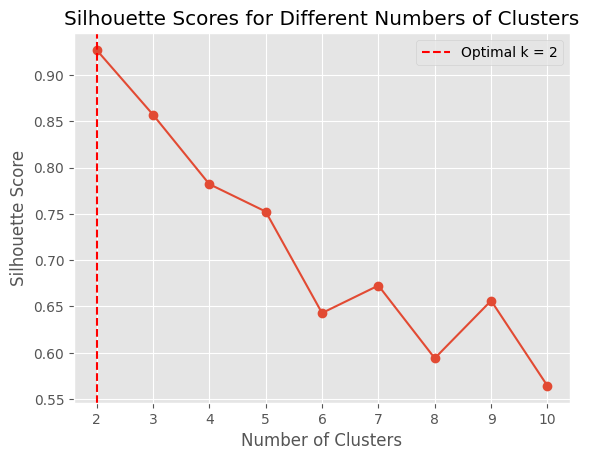

In [41]:
#Coeficiente de Silhoutte para el número de grupos
data=datos[["sales", "profits", "assets", "marketvalue"]]

def fviz_nbclust(data, max_k):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)

    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Scores for Different Numbers of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')

    # Find the optimal number of clusters (k)
    optimal_k = np.argmax(silhouette_scores) + 2  # Add 2 because the range starts from 2

    # Add a vertical line at the optimal k
    plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
    plt.legend()

    plt.show()

# Call the function with the desired maximum number of clusters
fviz_nbclust(data, max_k=10)

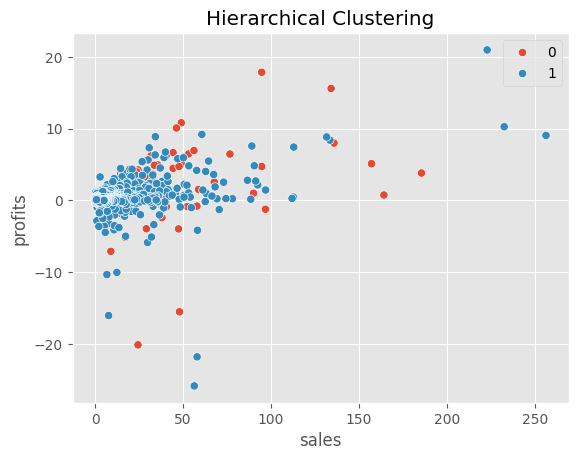

In [42]:
#El cálculo del cluster N=2 GRUPOS

model = AgglomerativeClustering(n_clusters=2)
model.fit(data)
labels = model.labels_

sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=model.labels_)
plt.title('Hierarchical Clustering')
plt.show()




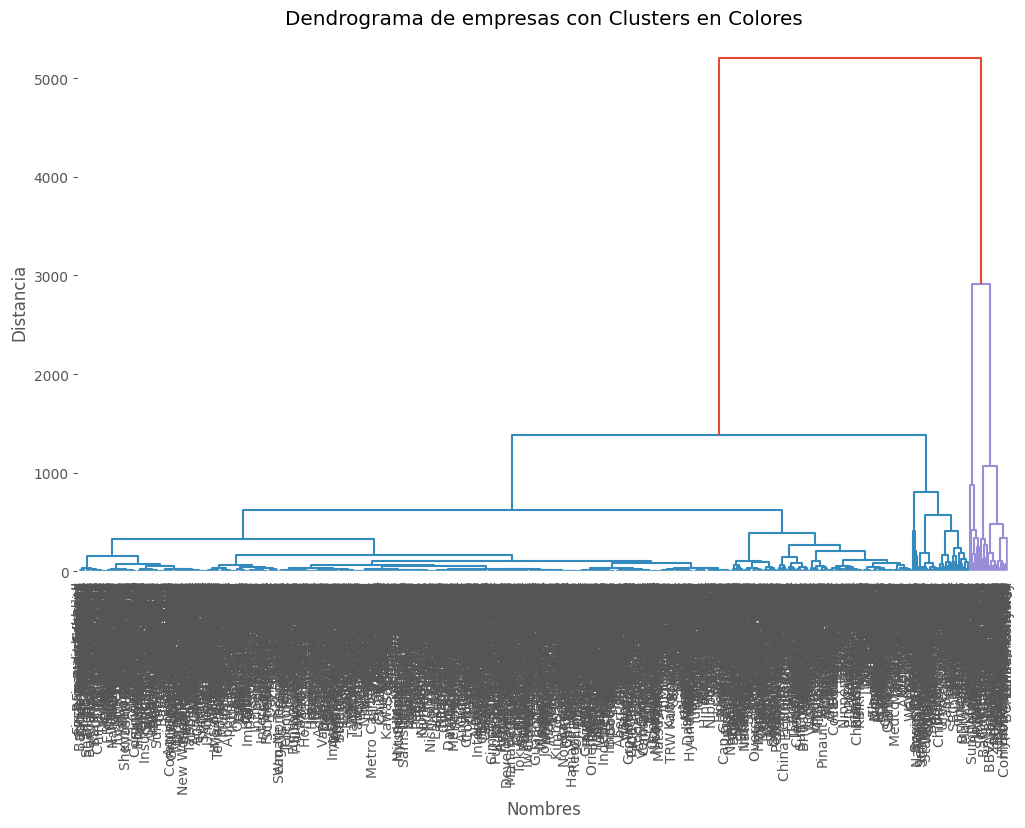

In [43]:
#El dendograma
model = sch.linkage(data, method='ward')

threshold = 0.7 * max(model[:, 2])  # Se basa en la distancia máxima para cortar

names = datos['name']
cluster_df = pd.DataFrame({'Name': names, 'Cluster': labels})



# Graficar el dendrograma con etiquetas de países y colores para los clusters
plt.figure(figsize=(12, 7))
sch.dendrogram(
    model,
    labels=names.tolist(),
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=threshold  # Define el punto de corte para los colores
)

plt.title('Dendrograma de empresas con Clusters en Colores')
plt.xlabel('Nombres')
plt.ylabel('Distancia')
plt.show()

In [44]:
# Obtener las etiquetas del cluster
cluster_df.to_csv('cluster_puras2.csv', index=False)

#Guardar el .csv
cluster_df.to_csv('cluster_puras2.csv', index=False)

# Display the DataFrame
cluster_df


,Name,Cluster
0,Citigroup,0
1,General Electric,0
2,American Intl Group,0
3,ExxonMobil,1
4,BP,1
...,...,...
1995,Siam City Bank,1
1996,Yokogawa Electric,1
1997,Hindalco Industries,1
1998,Nexans,1


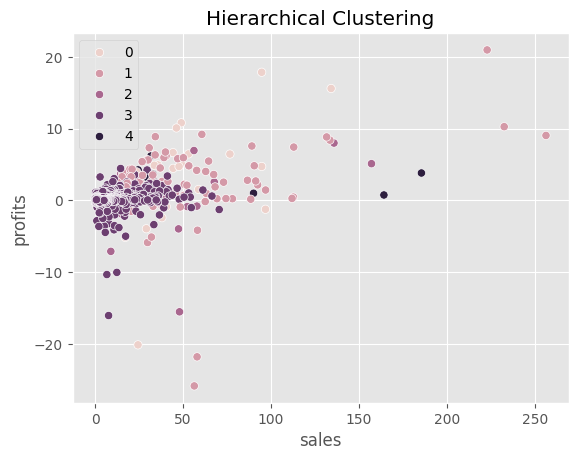

In [45]:
#El cálculo del cluster N=5 GRUPOS
model = AgglomerativeClustering(n_clusters=5)
model.fit(data)
labels = model.labels_
cluster_df = pd.DataFrame({'Name': names, 'Cluster': labels})
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=model.labels_)
plt.title('Hierarchical Clustering')
plt.show()

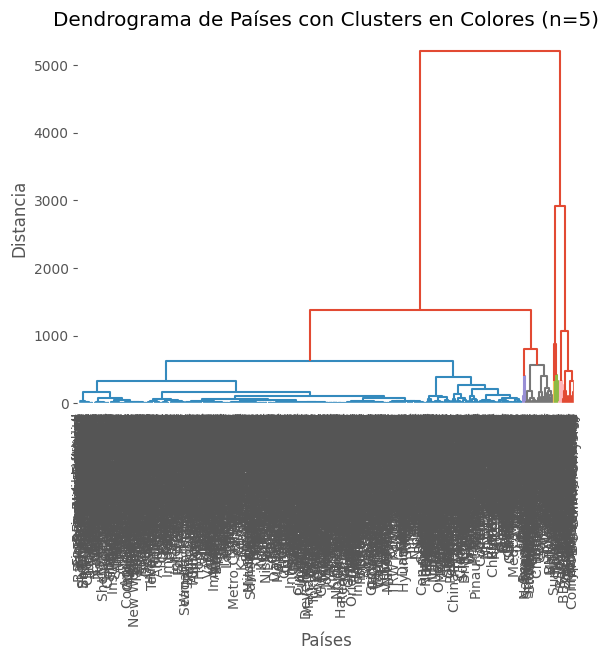

In [46]:
#Dendograma para 5 grupos

# Generar la matriz de enlaces con el método de Ward
model_linkage = sch.linkage(data, method='ward')

# Obtener etiquetas exactas de 5 clusters
cluster_labels = fcluster(model_linkage, t=5, criterion='maxclust')

# Asegurar que el umbral de corte refleje 5 clusters
distances = model_linkage[:, 2]
distances_sorted = np.sort(distances)
color_threshold = distances_sorted[-6]  # Ajuste preciso para 5 clusters

# Verificar si hay menos de 5 colores y ajustar si es necesario
dn = dendrogram(
    model_linkage,
    labels=names.tolist(),
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=color_threshold
)

# Obtener los colores usados en el dendrograma
colors_used = set(dn['leaves_color_list'])

# Si hay menos de 5 colores, ajustar el umbral y volver a dibujar
if len(colors_used) < 5:
    plt.close()  # Cerrar el primer gráfico antes de generar el nuevo
    color_threshold = distances_sorted[-7]  # Reducimos el umbral para forzar más colores

    # Graficar el dendrograma corregido
    plt.figure(figsize=(12, 7))
    dendrogram(
       model_linkage,
       labels=names.tolist(),
       leaf_rotation=90,
       leaf_font_size=10,
       color_threshold=color_threshold
    )

plt.title('Dendrograma de Países con Clusters en Colores (n=5)')
plt.xlabel('Países')
plt.ylabel('Distancia')
plt.show()






In [47]:
# Obtener las etiquetas del cluster
cluster_df.to_csv('cluster_puras5.csv', index=False)

#Guardar el .csv
cluster_df.to_csv('cluster_puras5.csv', index=False)

# Display the DataFrame
cluster_df

,Name,Cluster
0,Citigroup,0
1,General Electric,0
2,American Intl Group,0
3,ExxonMobil,1
4,BP,1
...,...,...
1995,Siam City Bank,3
1996,Yokogawa Electric,3
1997,Hindalco Industries,3
1998,Nexans,3


In [48]:
selected_pca = df_pca_scores[["PC1", "PC2"]]
selected_pca

,PC1,PC2
0,14.180222,3.722001
1,16.610453,1.000117
2,8.617677,-0.477796
3,19.766729,0.776133
4,14.211918,-3.786596
...,...,...
1995,-0.667509,0.198589
1996,-0.620774,0.004703
1997,-0.570647,0.216827
1998,-0.541311,0.040814


In [49]:
# Concatenar los datos de selected_pca con el DataFrame datos
datos_concatenados = pd.concat([datos, selected_pca], axis=1)

# Mostrar las primeras filas del DataFrame resultante
datos_concatenados.head()

,rownames,rank,name,country,category,sales,profits,assets,marketvalue,PC1,PC2
0,1,1,Citigroup,United States,Banking,94.71,17.85,1264.03,255.30,14.180222,3.722001
1,2,2,General Electric,United States,Conglomerates,134.19,15.59,626.93,328.54,16.610453,1.000117
2,3,3,American Intl Group,United States,Insurance,76.66,6.46,647.66,194.87,8.617677,-0.477796
3,4,4,ExxonMobil,United States,Oil & gas operations,222.88,20.96,166.99,277.02,19.766729,0.776133
4,5,5,BP,United Kingdom,Oil & gas operations,232.57,10.27,177.57,173.54,14.211918,-3.786596


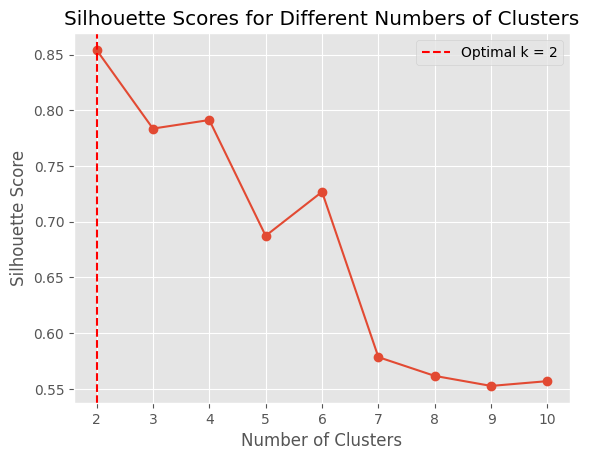

In [50]:
#Coeficiente de Silhoutte para el número de grupos
data=datos_concatenados[["PC1", "PC2"]]

def fviz_nbclust(data, max_k):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)

    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Scores for Different Numbers of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')

    # Find the optimal number of clusters (k)
    optimal_k = np.argmax(silhouette_scores) + 2  # Add 2 because the range starts from 2

    # Add a vertical line at the optimal k
    plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
    plt.legend()

    plt.show()

# Call the function with the desired maximum number of clusters
fviz_nbclust(data, max_k=10)

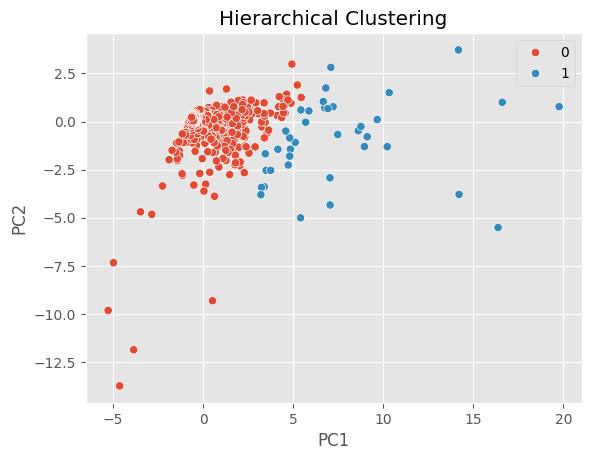

In [51]:
#El cálculo del cluster N=2 GRUPOS
names = datos['name']
model = AgglomerativeClustering(n_clusters=2)
model.fit(data)
labels = model.labels_
cluster_df = pd.DataFrame({'Name': names, 'Cluster': labels})
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=model.labels_)
plt.title('Hierarchical Clustering')
plt.show()




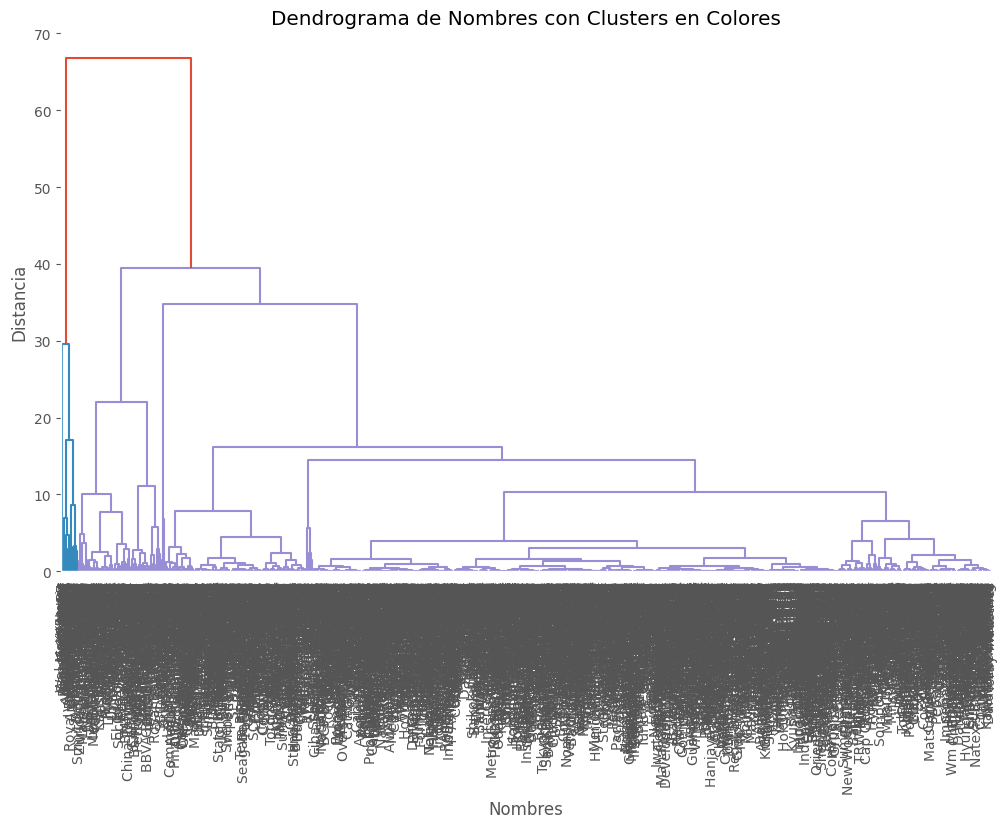

In [52]:
#El dendograma
model = sch.linkage(data, method='ward')

threshold = 0.7 * max(model[:, 2])  # Se basa en la distancia máxima para cortar


# Graficar el dendrograma con etiquetas de países y colores para los clusters
plt.figure(figsize=(12, 7))
sch.dendrogram(
    model,
    labels=names.tolist(),
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=threshold  # Define el punto de corte para los colores
)

plt.title('Dendrograma de Nombres con Clusters en Colores')
plt.xlabel('Nombres')
plt.ylabel('Distancia')
plt.show()

In [53]:
# Obtener las etiquetas del cluster
cluster_df.to_csv('cluster_puras2.csv', index=False)

#Guardar el .csv
cluster_df.to_csv('cluster_puras2.csv', index=False)

# Display the DataFrame
cluster_df


,Name,Cluster
0,Citigroup,1
1,General Electric,1
2,American Intl Group,1
3,ExxonMobil,1
4,BP,1
...,...,...
1995,Siam City Bank,0
1996,Yokogawa Electric,0
1997,Hindalco Industries,0
1998,Nexans,0
